# Twitterでフォロワーをクラスタリングしてみた。
---

### 使うライブラリ
networkx, pandas, matplotlib

## 目次
- クラスタリングに必要なデータとは、
- クラスタリングをするために必要な手順（ライブラリや、データ整形など）
- 結果見る
- 結果をDB情報から引っ張ってきてさらにみて見る。
- 結果を元に、クラスタの属性分析をする方向性を固める。
    - 今のところ、自己紹介文を使って、tf-idfで処理し、属性を表す単語をピックアップする予定。
- 属性分析

## クラスタリングに必要なデータとは。
簡単にまとめると、  
ノードとエッジのみ。

今回の場合は、  
ノード = フォロワー（twitterユーザー）  
エッジ = 繋がりの関係（誰が誰をフォローしているのかということ）

ちょっとしたデモやる

In [12]:
import os, sys
sys.path.append('..')

import json

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# グラフの定義
G = nx.DiGraph()

In [14]:
# エッジの追加
G.add_node(1)

In [15]:
# エッジの追加。存在しないノードは勝手に作ってくれる。
G.add_edge(2, 3)

In [16]:
# 存在するノードの確認
G.nodes()

NodeView((1, 2, 3))

In [17]:
# 存在するエッジの確認
G.edges()

OutEdgeView([(2, 3)])

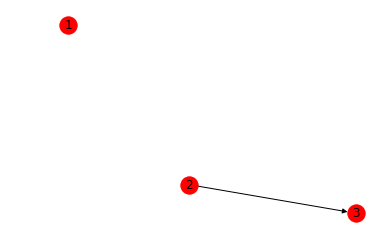

In [18]:
plt.figure(figsize=(6,4))
pos = nx.spring_layout(G) # グラフにラベルつける。
nx.draw_networkx(G, pos)
plt.axis("off")
plt.show()

## クラスタリングをするために必要な手順（ライブラリや、データ整形など）
__ライブラリ__  
ライブラリは前述したものを参考に。  

__データ__  
- twitterのuser_idをひとまず、ノードの判別に利用する。
- フォロワーがフォローしているユーザー群を持ってきて、フォロワーに含まれるuser_idを取得  
イメージ  
```
dict = {ユーザーA: [B, C, D, F], ユーザーB: [A, D, E], ...}
```

In [19]:
from functions import twitter

In [20]:
with open('../data/key.json') as f:
    keys = json.load(f)

tw = twitter(keys)